In [1]:
import csv
import numpy as np
import ast  # Safer than eval for parsing strings to lists

def load_from_csv(filename):
    data_loaded = {}
    with open(filename, mode='r', newline='') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header
        for row in reader:
            key = row[0]
            # Safely convert the string representation of the array back to a list
            values = ast.literal_eval(row[1])  
            data_loaded[key] = np.asarray(values, dtype=np.complex128)  # Use complex128 for complex numbers
    return data_loaded

single_register_dm_01 = load_from_csv('t_01_DME_work.csv')
two_register_dm_01 = load_from_csv('t_01_DME_work_n_mem.csv')


In [2]:
from entropy import von_neumann_entropy, purity

In [3]:
single_reg_entropy = {}
single_reg_purity = {}
for key, value in single_register_dm_01.items():
    single_reg_entropy[key] = von_neumann_entropy(value)
    single_reg_purity[key] = purity(value)

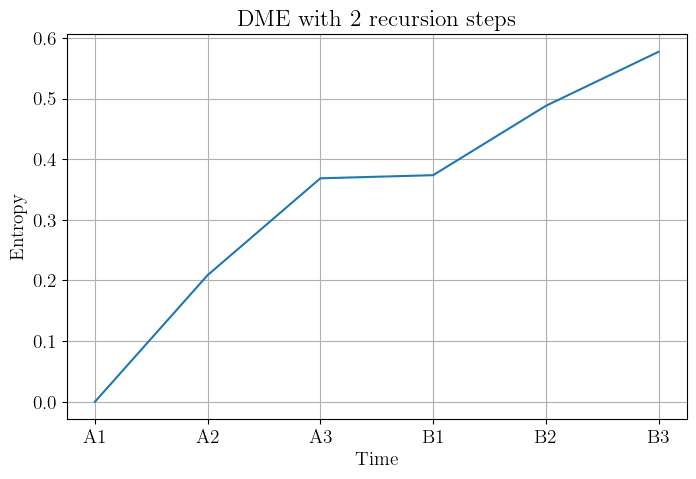

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "text.usetex": True, # Comment out this line if your code doesn't run/ take too long
    "font.family": "serif",
    "figure.dpi": 100, # Comment out this line if your code doesn't run/ take too long
    "font.size": 14
})


labels = [key.split('_')[-1] for key in single_reg_entropy.keys()]
entropies = list(single_reg_entropy.values())
purities = list(single_reg_purity.values())

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(labels, entropies, color='C0')
plt.xlabel('Time')
plt.ylabel('Entropy')
plt.title('DME with 2 recursion steps')
plt.grid()
plt.show()

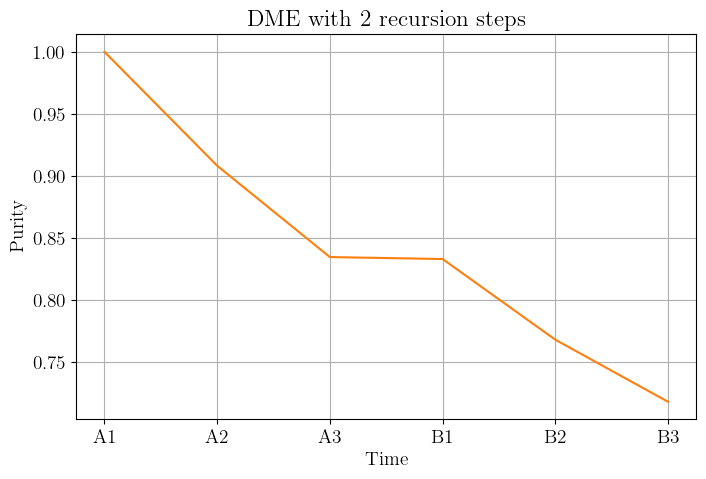

In [5]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(labels, purities, color='C1')
plt.xlabel('Time')
plt.ylabel('Purity')
plt.title('DME with 2 recursion steps')
plt.grid()
plt.show()